This file is part of a program that is used to develop an objective way to
segment the fetus from ultrasound images, and to analyse the effectiveness of 
using the resulting mask to produce an unobstructed visualisation of the fetus.
The research is organised in three phases: (1) noise reduction filters, 
(2a) heuristic segmentation models, (2b) deep learning segmentation
approach (U-net), and (3) the volume visualisation. The program is developed
for the master Computational Science at the UvA from February to November 2020.

This file contains code for the noise reduction filters. <br>
You can run this file to plot the results of the statistics and the corresponding images.

Made by Romy Meester


In [1]:
"""
Phase 1: The noise reduction filters.
"""

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [2]:
jtplot.style(context='paper', fscale=1.6, ticks=True, grid=False)

In [3]:
# Constants
DATA_PATH = '../datasets/'
RESULTS_PATH = 'results_filters'
RESULTS_IMG_PATH = os.path.join(RESULTS_PATH, 'results_filters_img') 
RESULTS_STATS_PATH = os.path.join(RESULTS_PATH, 'results_filters_stats') 

RESULTS_VIS_PATH = os.path.join(RESULTS_PATH, 'results_filters_visualisations') 
RESULTS_PLOTS_PATH = os.path.join(RESULTS_VIS_PATH, 'results_plot_stats_img')

In [4]:
def create_dir(PATH):
    """ Create a directory. """
    try:
        os.mkdir(PATH)
        print('Directory', PATH, 'created' )
    except FileExistsError:
        print('Directory', PATH, 'already exists' )

# create results folder for visualisations (plots)
create_dir(RESULTS_VIS_PATH)    

# create results folder for images (slices)
create_dir(RESULTS_PLOTS_PATH)

Directory results_filters\results_filters_visualisations already exists
Directory results_filters\results_filters_visualisations\results_plot_stats_img already exists


In [5]:
def load_data_pickle(PATH, filename):
    """ Load data from file using pickle. """
    with open(PATH + '/' + filename + ".pkl","rb") as f:
        new_data = pickle.load(f)
    return new_data

In [6]:
results = load_data_pickle(PATH = RESULTS_STATS_PATH, filename='results_pickle')
results.keys()

dict_keys(['MSE', 'SSIM', 'PSNR'])

# The results in a table 

In [7]:
# the results in a table with mean and std
for metric, filters in results.items():
    print(metric)
    for filter, values in filters.items():
        print(filter, len(values), round(np.mean(values),3), round(np.std(values),3))


MSE
anisodiff_4_10_0.04 7 0.001 0.0
anisodiff_4_10_0.06 7 0.001 0.0
anisodiff_4_15_0.04 7 0.001 0.0
anisodiff_4_15_0.06 7 0.002 0.0
curvatureflow_10_0.125 7 0.002 0.0
curvatureflow_10_0.25 7 0.003 0.0
curvatureflow_5_0.125 7 0.001 0.0
curvatureflow_5_0.25 7 0.002 0.0
gaussian_1 7 0.002 0.0
gaussian_2 7 0.003 0.0
gaussian_3 7 0.004 0.0
median_1 7 0.002 0.0
median_2 7 0.002 0.0
median_3 7 0.003 0.0
original 7 0.0 0.0
speckle 7 0.005 0.001
SSIM
anisodiff_4_10_0.04 7 0.884 0.014
anisodiff_4_10_0.06 7 0.846 0.018
anisodiff_4_15_0.04 7 0.848 0.018
anisodiff_4_15_0.06 7 0.799 0.023
curvatureflow_10_0.125 7 0.802 0.021
curvatureflow_10_0.25 7 0.709 0.03
curvatureflow_5_0.125 7 0.872 0.015
curvatureflow_5_0.25 7 0.788 0.023
gaussian_1 7 0.845 0.018
gaussian_2 7 0.669 0.029
gaussian_3 7 0.554 0.031
median_1 7 0.841 0.019
median_2 7 0.725 0.028
median_3 7 0.639 0.035
original 7 1.0 0.0
speckle 7 0.804 0.026
PSNR
anisodiff_4_10_0.04 7 77.727 0.556
anisodiff_4_10_0.06 7 76.885 0.578
anisodiff_4_15_

# The results in a barplot

In [8]:
def get_means(dataset):
    """ Get the mean values of the filters per metric. """
    # remove unnessesary data 
    data = dataset.copy()
    remove_keys = ('original', 'speckle')
   
    for k in remove_keys: 
        del data[k]

    # get the lists of values per dataset
    results = []
    for i in range(len(list(data.values())[0])):
        result = []
        for filters, filtervalues in data.items():
            result.append(filtervalues[i])
        results.append(result)

    # calculate the mean and standard deviation per dataset
    results_mean = []
    results_std = []
    for i in results:
        results_mean.append(np.mean(i))
        results_std.append(np.std(i))
    
    return results_mean, results_std


In [9]:
# create the dataframes
num_datasets = list(range(1, len(results['MSE']['original'])+1))
mse_mean, mse_std = get_means(results['MSE'])
ssim_mean, ssim_std = get_means(results['SSIM'])
psnr_mean, psnr_std = get_means(results['PSNR'])

df_mean = pd.DataFrame({'MSE': mse_mean,
                       'SSIM': ssim_mean,
                       'PSNR': psnr_mean}, 
                       index=num_datasets)

df_std = pd.DataFrame({'MSE': mse_std,
                       'SSIM': ssim_std,
                       'PSNR': psnr_std}, 
                       index=num_datasets)

In [10]:
df_mean

,MSE,SSIM,PSNR
1,0.002493,0.754600,74.518652
2,0.002166,0.770303,75.162758
3,0.002087,0.767177,75.280939
4,0.002040,0.741720,75.346243
5,0.001728,0.818402,76.213911
6,0.002158,0.784393,75.145052
7,0.002091,0.773061,75.336975


In [11]:
# show the results
print('lowest MSE:', df_mean['MSE'].min(), '  best dataset: ', str('dataset' + str(df_mean.MSE.idxmin())))
print('highest SSIM:', df_mean['SSIM'].max(), '   best dataset: ', str('dataset' + str(df_mean.SSIM.idxmax())))
print('highest PSNR:', df_mean['PSNR'].max(), '    best dataset: ', str('dataset' + str(df_mean.PSNR.idxmax())))
print()
print('highest MSE:', df_mean['MSE'].max(), ' worst dataset: ', str('dataset' + str(df_mean.MSE.idxmax())))
print('lowest SSIM:', df_mean['SSIM'].min(), '   worst dataset: ', str('dataset' + str(df_mean.SSIM.idxmin())))
print('lowest PSNR:', df_mean['PSNR'].min(), '    worst dataset: ', str('dataset' + str(df_mean.PSNR.idxmin())))

lowest MSE: 0.0017277939597065354   best dataset:  dataset5
highest SSIM: 0.8184017561859143    best dataset:  dataset5
highest PSNR: 76.21391123822669     best dataset:  dataset5

highest MSE: 0.002493264735627207  worst dataset:  dataset1
lowest SSIM: 0.7417195446321053    worst dataset:  dataset4
lowest PSNR: 74.51865232356047     worst dataset:  dataset1


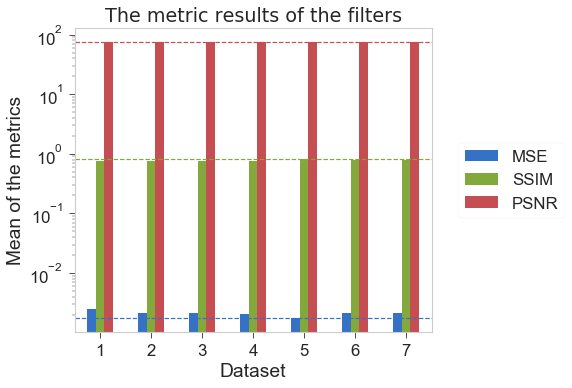

In [12]:
# Build the plot
ax = df_mean.plot.bar(rot=0)
plt.axhline(y=df_mean['MSE'].min(), color='b', linestyle='--')
plt.axhline(y=df_mean['SSIM'].max(), color='g', linestyle='--')
plt.axhline(y=df_mean['PSNR'].max(), color='r', linestyle='--')
plt.yscale('log')

ax.set_title("The metric results of the filters", fontname="DejaVu Sans")
ax.set_xlabel('Dataset')
ax.set_ylabel('Mean of the metrics')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.65))
plt.savefig(RESULTS_VIS_PATH + '/' + 'barplot_filters.png')
plt.show()


# Show and save the images (of the best performing dataset)

In [13]:
# load all the images
def load_data_pickle(PATH, filename):
    """ Load data from file using pickle. """
    with open(PATH + '/' + filename,"rb") as f:
        new_data = pickle.load(f)
    return new_data

filenames = [f for f in os.listdir(RESULTS_IMG_PATH) if os.path.isfile(os.path.join(RESULTS_IMG_PATH, f))]
dict_img = {}

for file in filenames:
    filename = file[:-4]
    image = load_data_pickle(RESULTS_IMG_PATH, file)
    dict_img.update({filename : image})
    

dataset1_anisodiff_4_10_0.04 76/151 (115, 141)


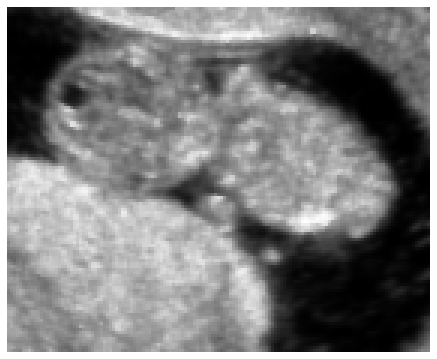

dataset1_anisodiff_4_10_0.06 76/151 (115, 141)


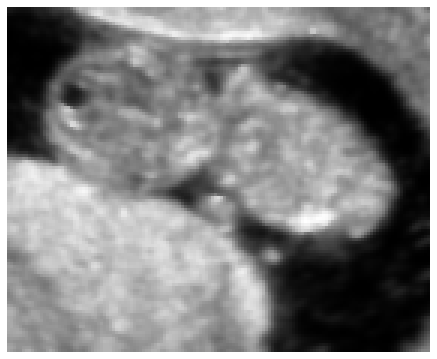

dataset1_anisodiff_4_15_0.04 76/151 (115, 141)


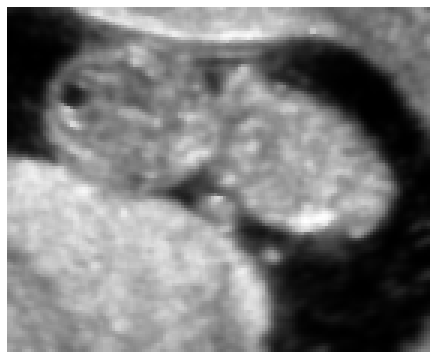

dataset1_anisodiff_4_15_0.06 76/151 (115, 141)


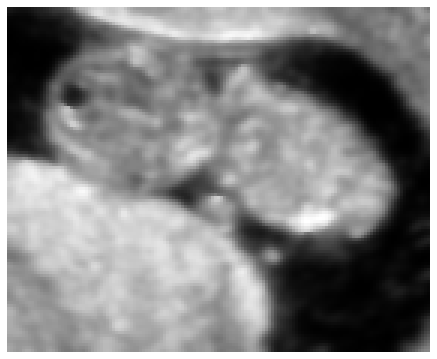

dataset1_curvatureflow_10_0.125 76/151 (115, 141)


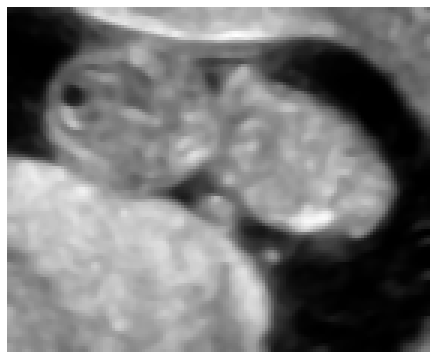

dataset1_curvatureflow_10_0.25 76/151 (115, 141)


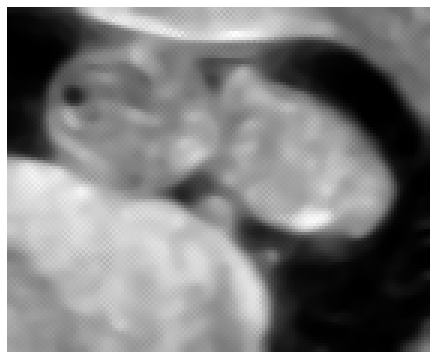

dataset1_curvatureflow_5_0.125 76/151 (115, 141)


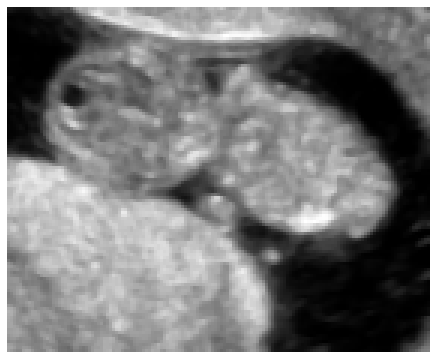

dataset1_curvatureflow_5_0.25 76/151 (115, 141)


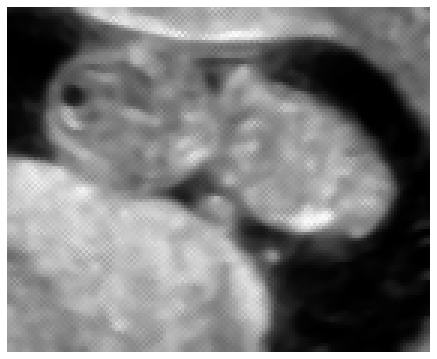

dataset1_gaussian_1 76/151 (115, 141)


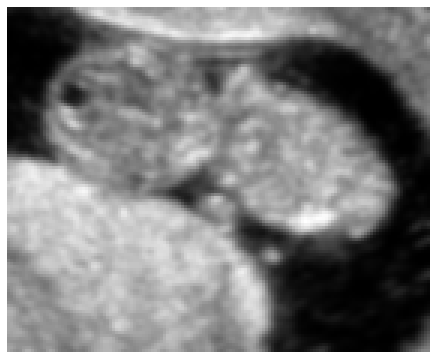

dataset1_gaussian_2 76/151 (115, 141)


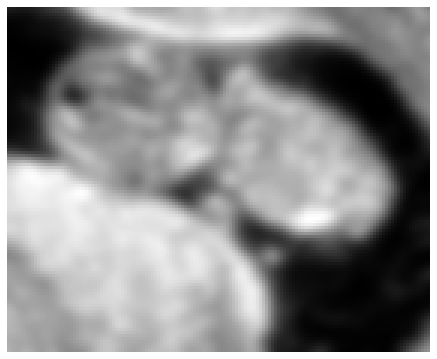

dataset1_gaussian_3 76/151 (115, 141)


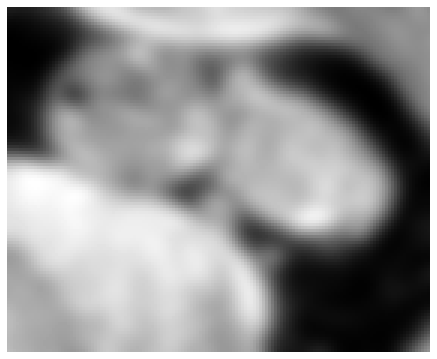

dataset1_median_1 76/151 (115, 141)


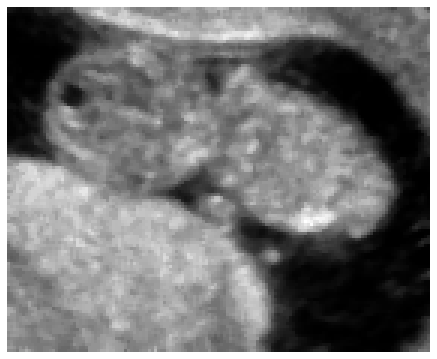

dataset1_median_2 76/151 (115, 141)


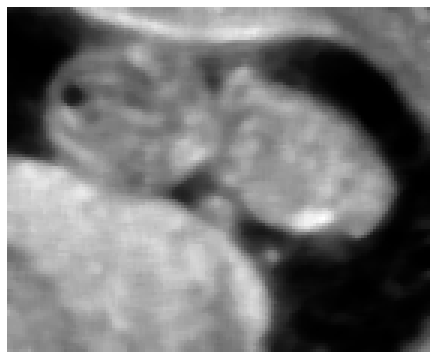

dataset1_median_3 76/151 (115, 141)


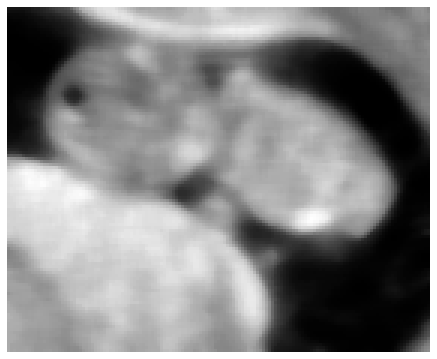

dataset1_original 76/151 (115, 141)


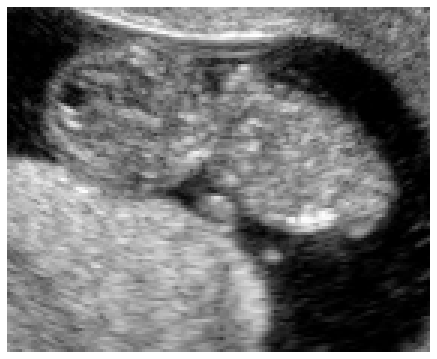

dataset1_speckle 76/151 (115, 141)


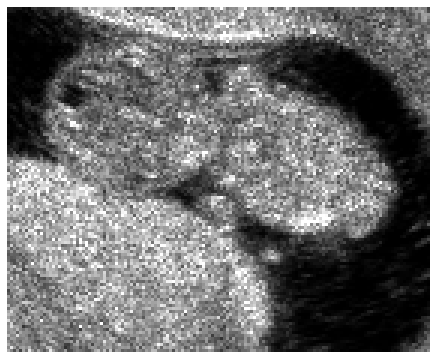

dataset2_anisodiff_4_10_0.04 58/115 (87, 148)


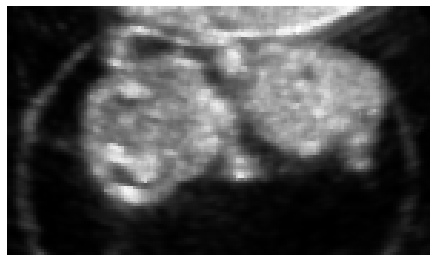

dataset2_anisodiff_4_10_0.06 58/115 (87, 148)


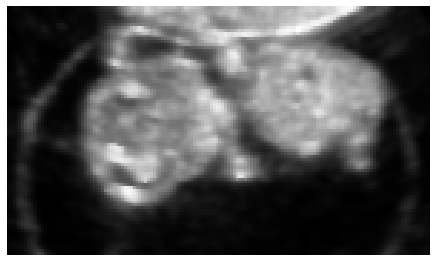

dataset2_anisodiff_4_15_0.04 58/115 (87, 148)


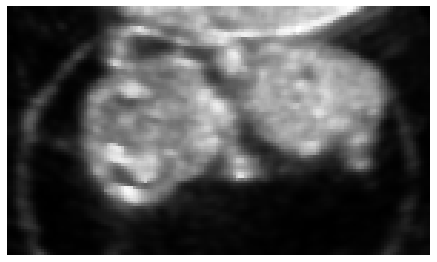

dataset2_anisodiff_4_15_0.06 58/115 (87, 148)


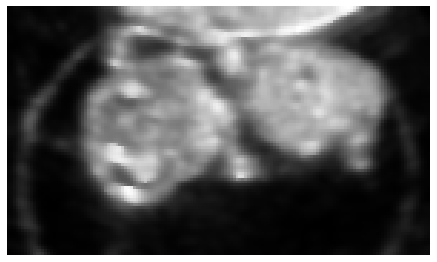

dataset2_curvatureflow_10_0.125 58/115 (87, 148)


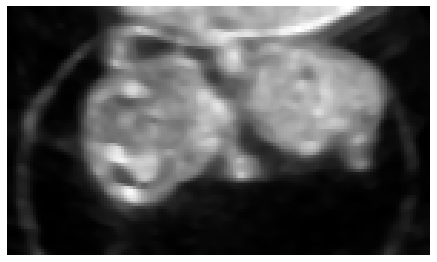

dataset2_curvatureflow_10_0.25 58/115 (87, 148)


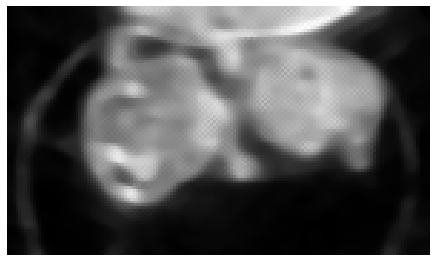

dataset2_curvatureflow_5_0.125 58/115 (87, 148)


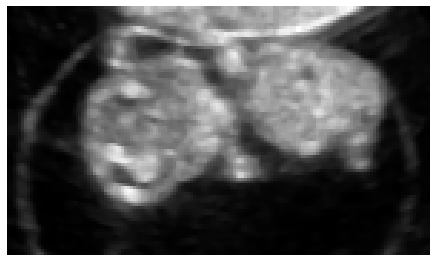

dataset2_curvatureflow_5_0.25 58/115 (87, 148)


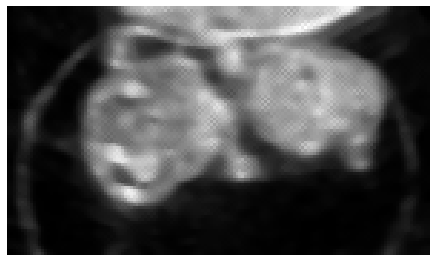

dataset2_gaussian_1 58/115 (87, 148)


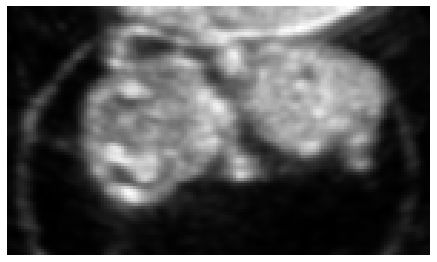

dataset2_gaussian_2 58/115 (87, 148)


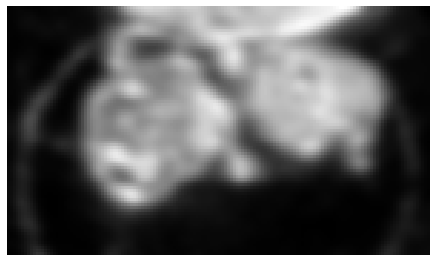

dataset2_gaussian_3 58/115 (87, 148)


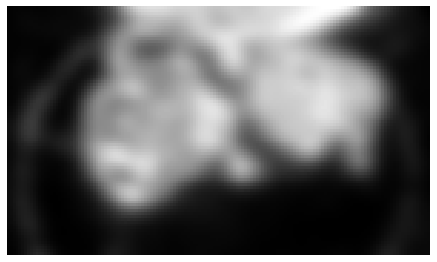

dataset2_median_1 58/115 (87, 148)


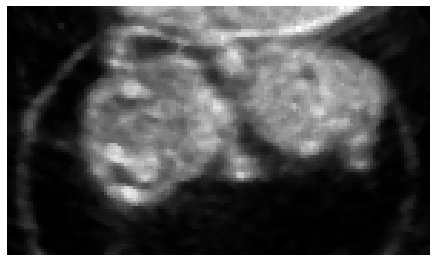

dataset2_median_2 58/115 (87, 148)


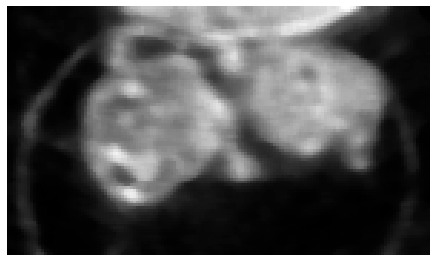

dataset2_median_3 58/115 (87, 148)


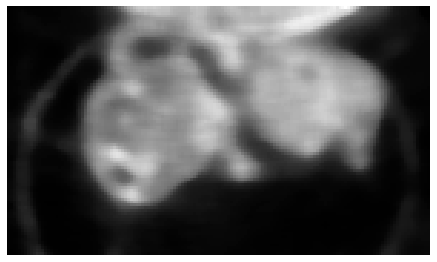

dataset2_original 58/115 (87, 148)


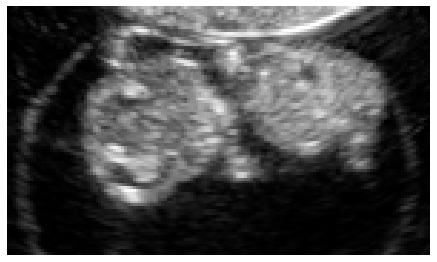

dataset2_speckle 58/115 (87, 148)


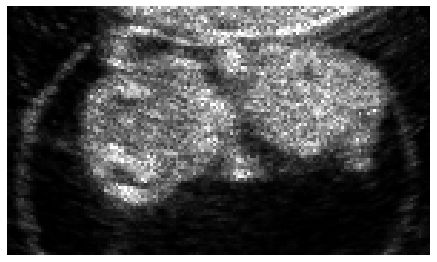

dataset3_anisodiff_4_10_0.04 52/104 (148, 155)


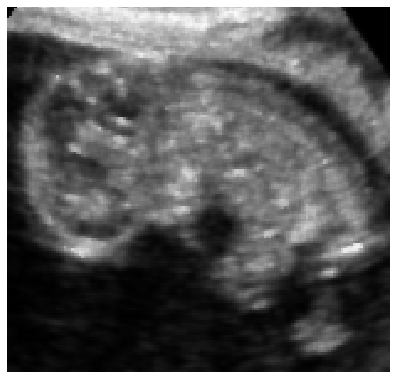

dataset3_anisodiff_4_10_0.06 52/104 (148, 155)


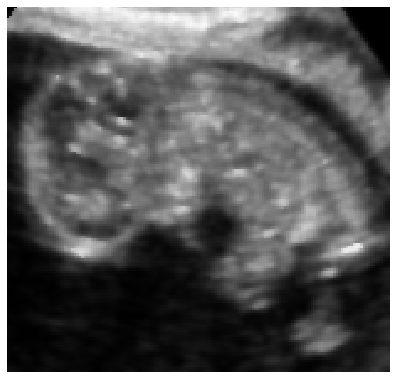

dataset3_anisodiff_4_15_0.04 52/104 (148, 155)


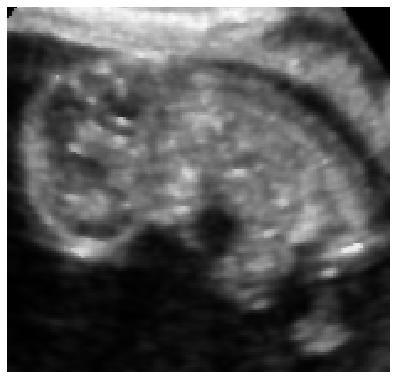

dataset3_anisodiff_4_15_0.06 52/104 (148, 155)


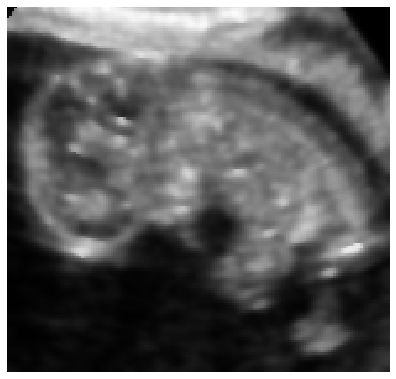

dataset3_curvatureflow_10_0.125 52/104 (148, 155)


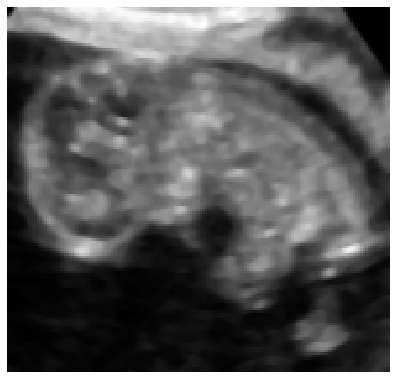

dataset3_curvatureflow_10_0.25 52/104 (148, 155)


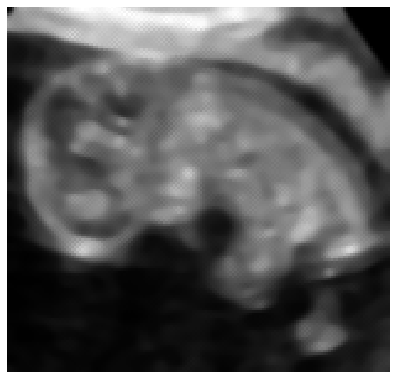

dataset3_curvatureflow_5_0.125 52/104 (148, 155)


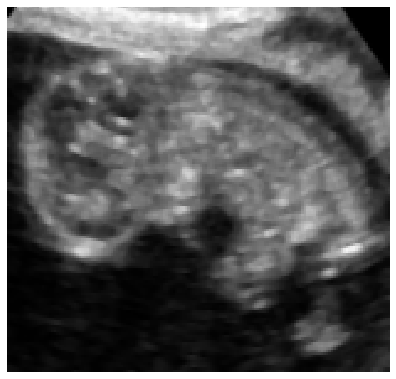

dataset3_curvatureflow_5_0.25 52/104 (148, 155)


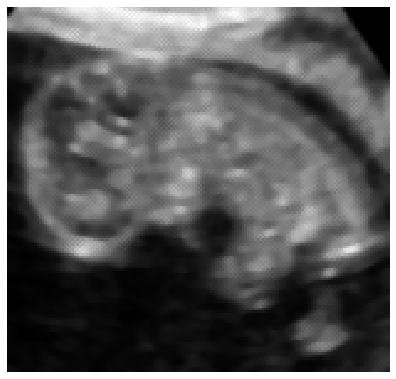

dataset3_gaussian_1 52/104 (148, 155)


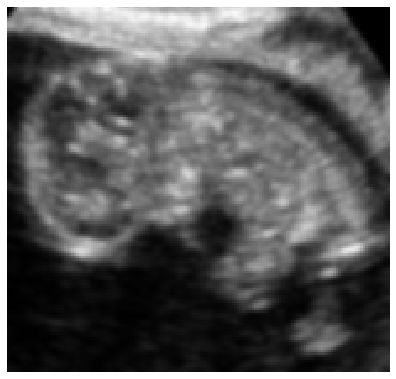

dataset3_gaussian_2 52/104 (148, 155)


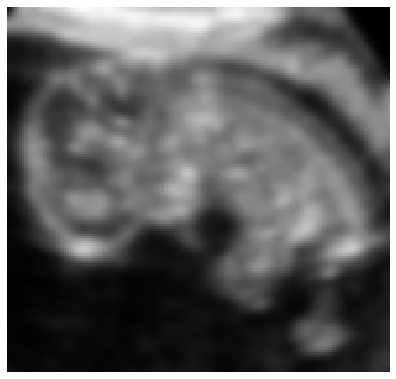

dataset3_gaussian_3 52/104 (148, 155)


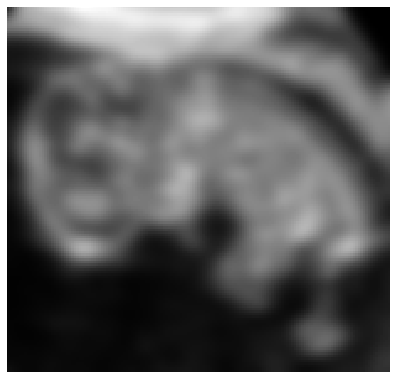

dataset3_median_1 52/104 (148, 155)


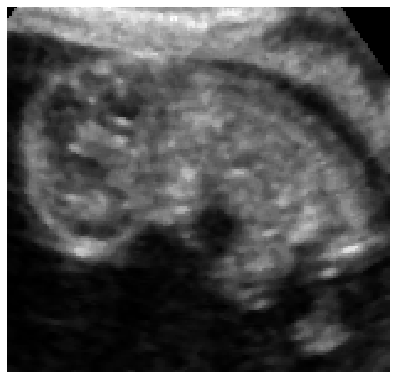

dataset3_median_2 52/104 (148, 155)


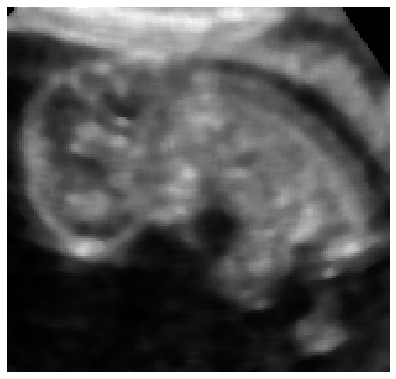

dataset3_median_3 52/104 (148, 155)


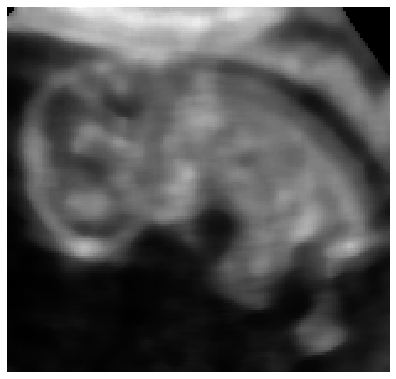

dataset3_original 52/104 (148, 155)


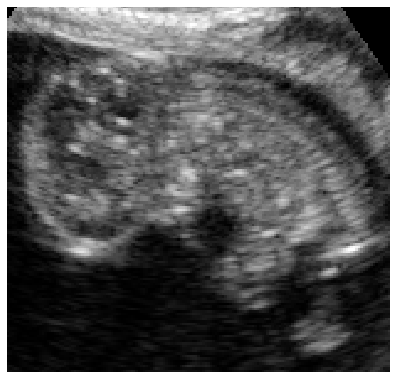

dataset3_speckle 52/104 (148, 155)


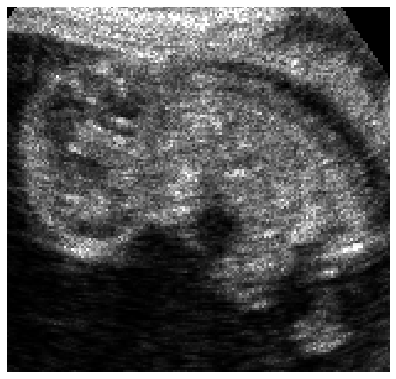

dataset4_anisodiff_4_10_0.04 72/143 (111, 131)


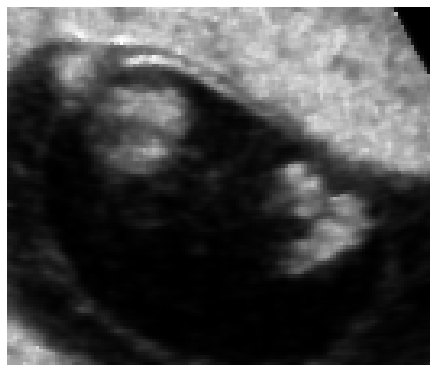

dataset4_anisodiff_4_10_0.06 72/143 (111, 131)


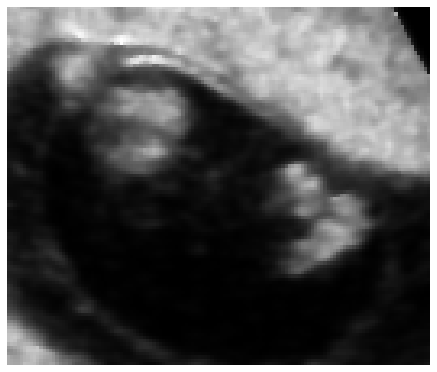

dataset4_anisodiff_4_15_0.04 72/143 (111, 131)


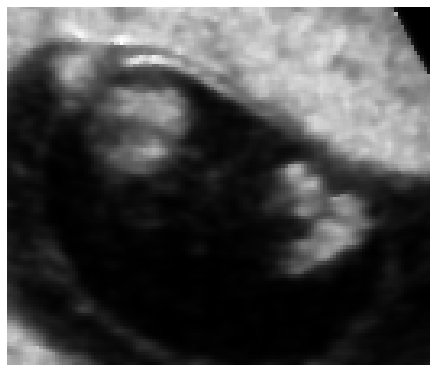

dataset4_anisodiff_4_15_0.06 72/143 (111, 131)


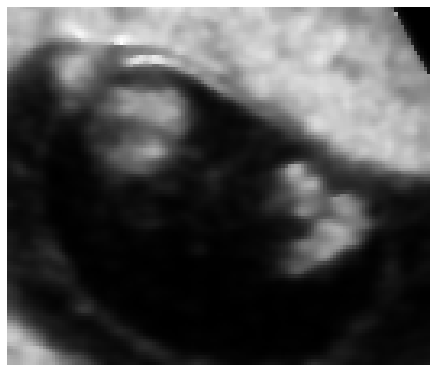

dataset4_curvatureflow_10_0.125 72/143 (111, 131)


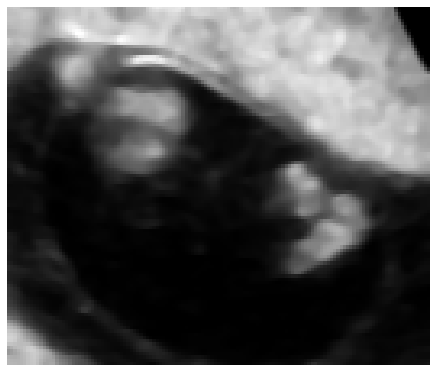

dataset4_curvatureflow_10_0.25 72/143 (111, 131)


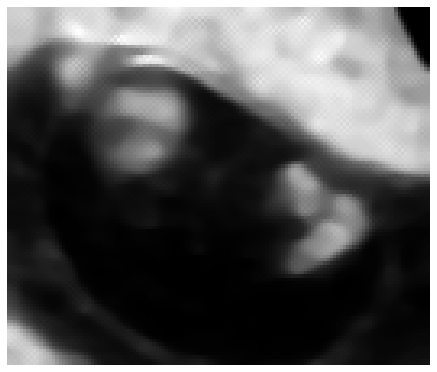

dataset4_curvatureflow_5_0.125 72/143 (111, 131)


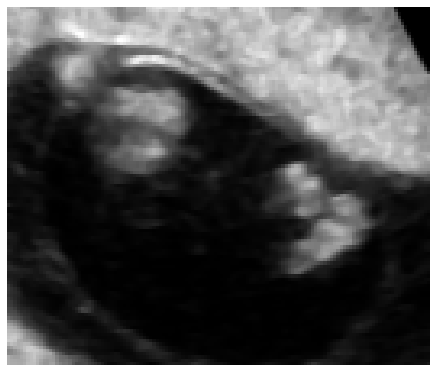

dataset4_curvatureflow_5_0.25 72/143 (111, 131)


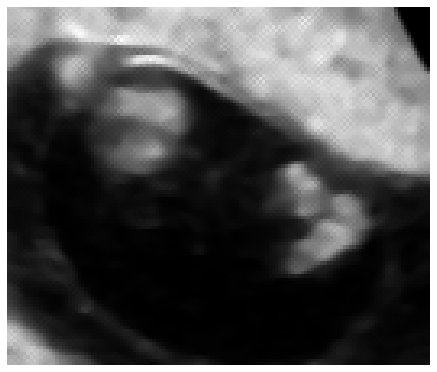

dataset4_gaussian_1 72/143 (111, 131)


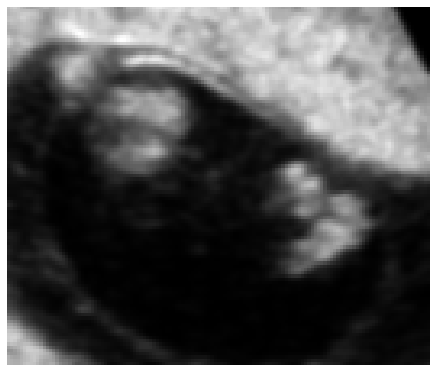

dataset4_gaussian_2 72/143 (111, 131)


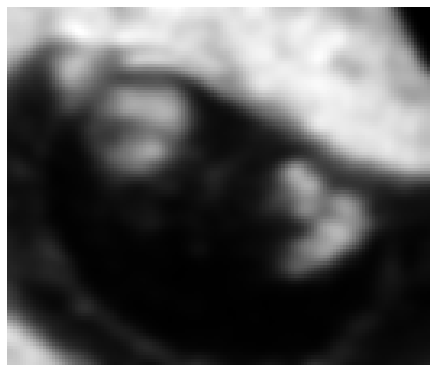

dataset4_gaussian_3 72/143 (111, 131)


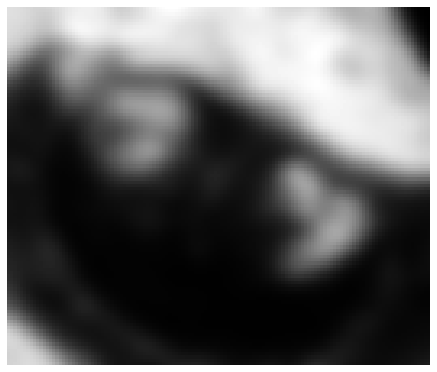

dataset4_median_1 72/143 (111, 131)


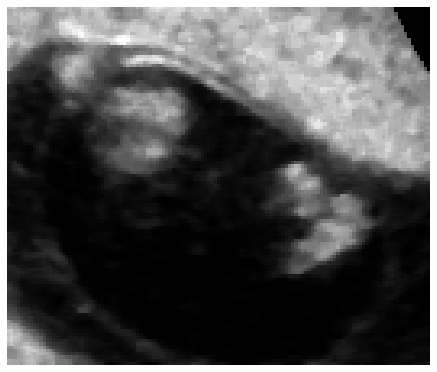

dataset4_median_2 72/143 (111, 131)


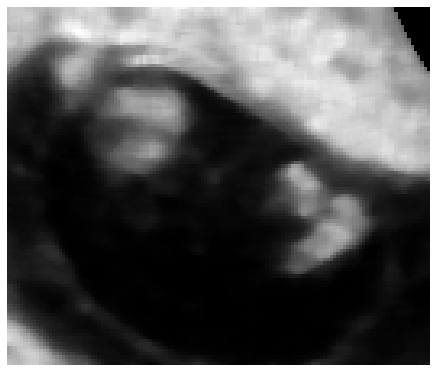

dataset4_median_3 72/143 (111, 131)


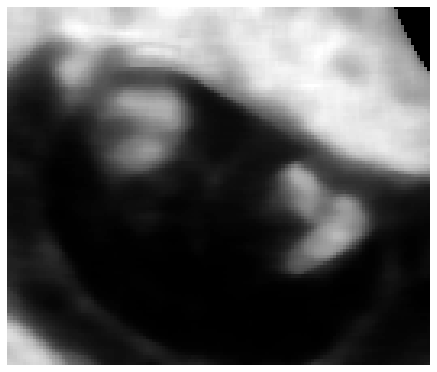

dataset4_original 72/143 (111, 131)


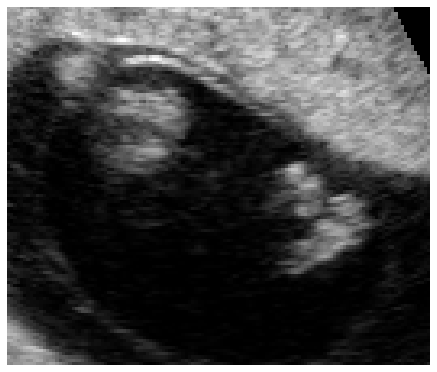

dataset4_speckle 72/143 (111, 131)


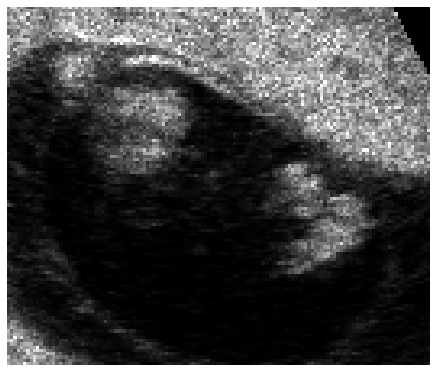

dataset5_anisodiff_4_10_0.04 104/207 (144, 180)


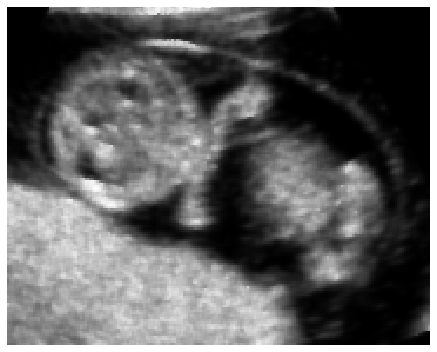

dataset5_anisodiff_4_10_0.06 104/207 (144, 180)


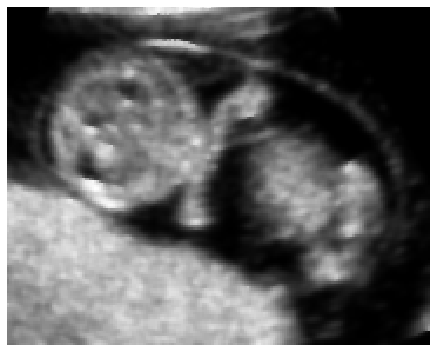

dataset5_anisodiff_4_15_0.04 104/207 (144, 180)


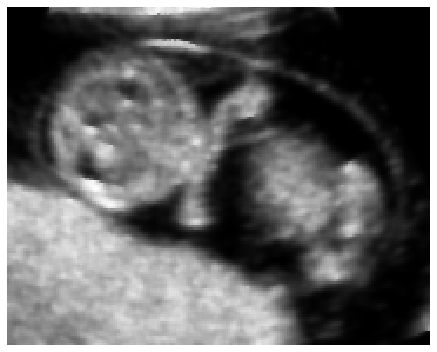

dataset5_anisodiff_4_15_0.06 104/207 (144, 180)


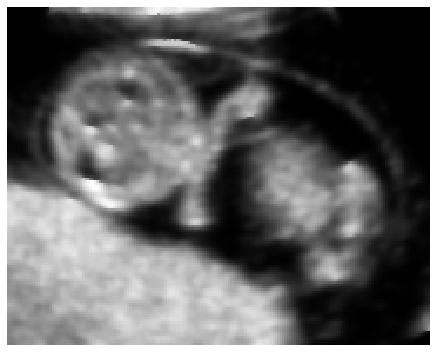

dataset5_curvatureflow_10_0.125 104/207 (144, 180)


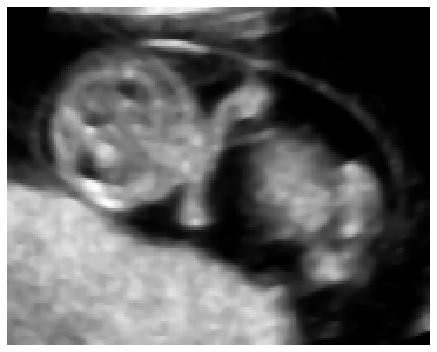

dataset5_curvatureflow_10_0.25 104/207 (144, 180)


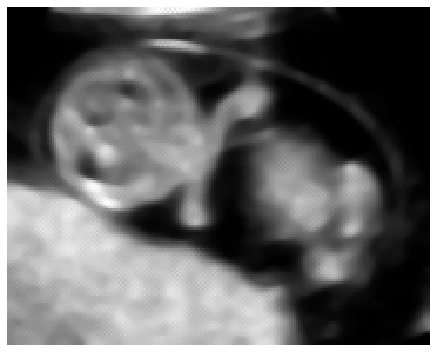

dataset5_curvatureflow_5_0.125 104/207 (144, 180)


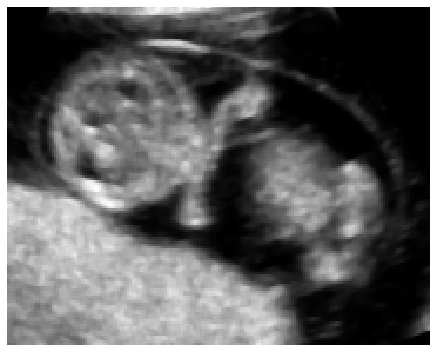

dataset5_curvatureflow_5_0.25 104/207 (144, 180)


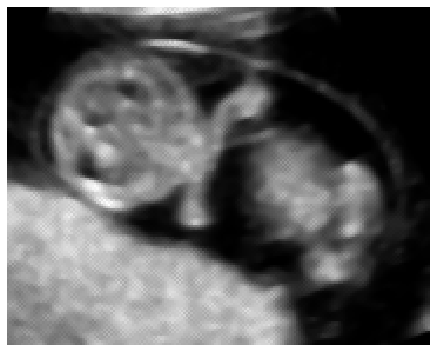

dataset5_gaussian_1 104/207 (144, 180)


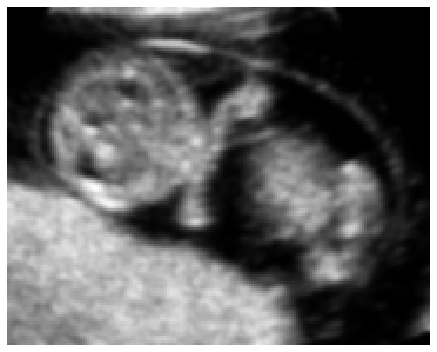

dataset5_gaussian_2 104/207 (144, 180)


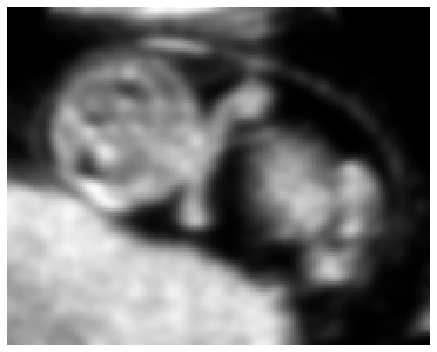

dataset5_gaussian_3 104/207 (144, 180)


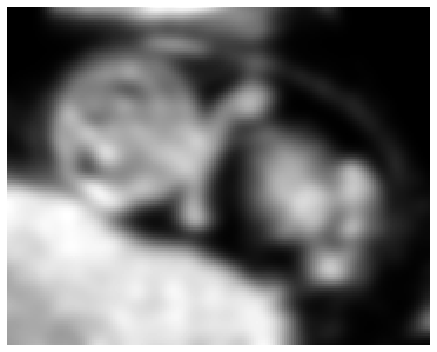

dataset5_median_1 104/207 (144, 180)


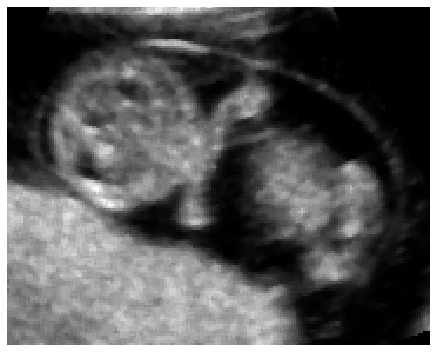

dataset5_median_2 104/207 (144, 180)


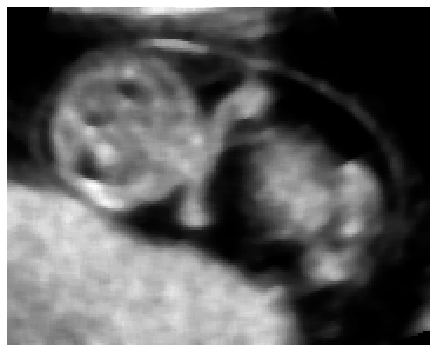

dataset5_median_3 104/207 (144, 180)


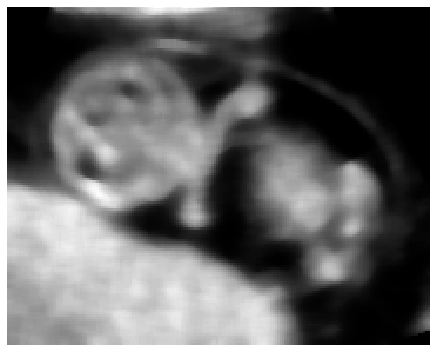

dataset5_original 104/207 (144, 180)


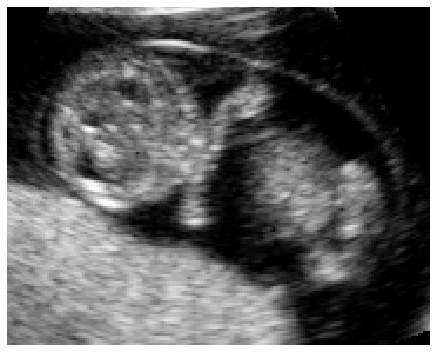

dataset5_speckle 104/207 (144, 180)


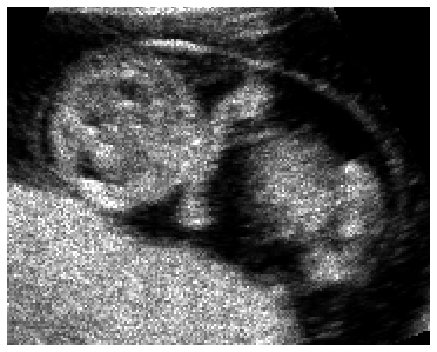

dataset6_anisodiff_4_10_0.04 90/180 (112, 140)


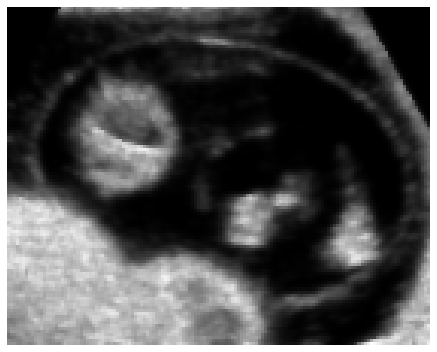

dataset6_anisodiff_4_10_0.06 90/180 (112, 140)


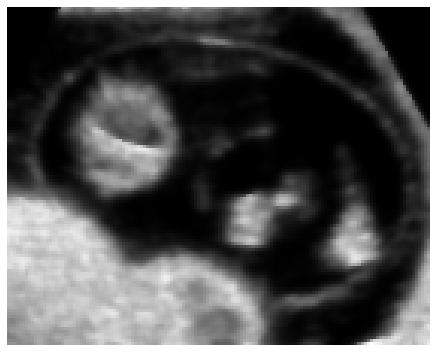

dataset6_anisodiff_4_15_0.04 90/180 (112, 140)


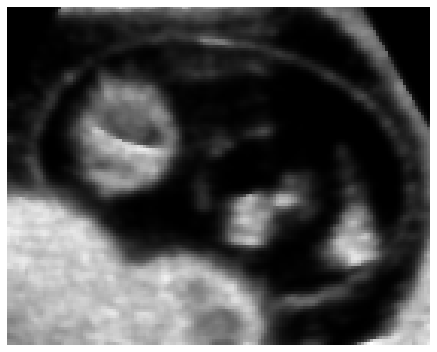

dataset6_anisodiff_4_15_0.06 90/180 (112, 140)


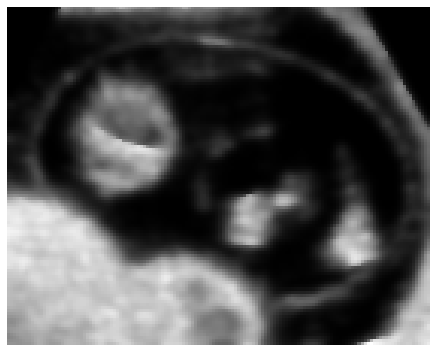

dataset6_curvatureflow_10_0.125 90/180 (112, 140)


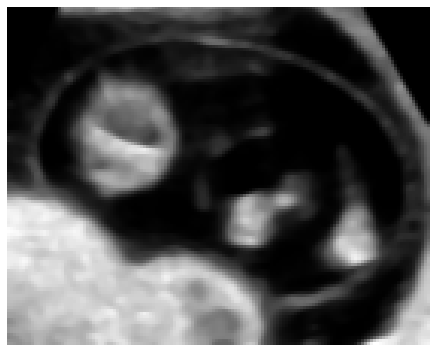

dataset6_curvatureflow_10_0.25 90/180 (112, 140)


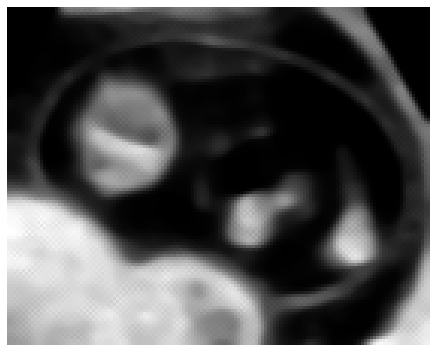

dataset6_curvatureflow_5_0.125 90/180 (112, 140)


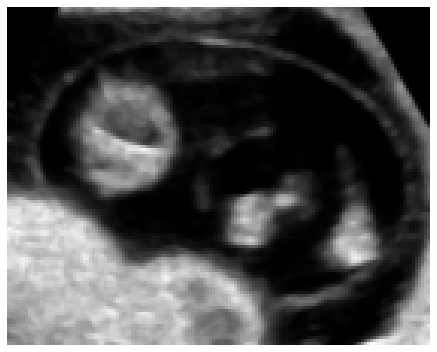

dataset6_curvatureflow_5_0.25 90/180 (112, 140)


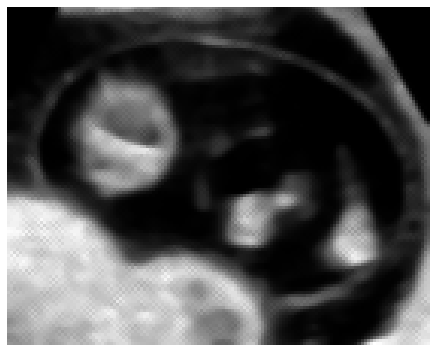

dataset6_gaussian_1 90/180 (112, 140)


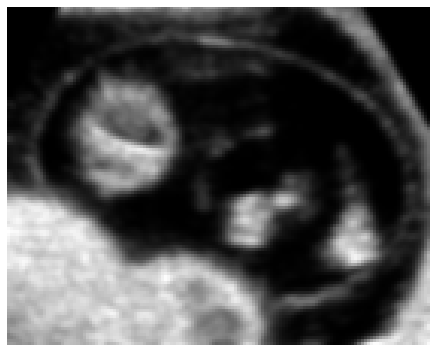

dataset6_gaussian_2 90/180 (112, 140)


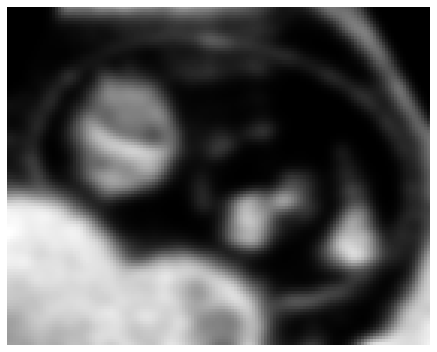

dataset6_gaussian_3 90/180 (112, 140)


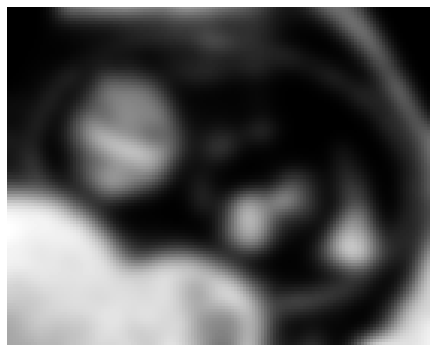

dataset6_median_1 90/180 (112, 140)


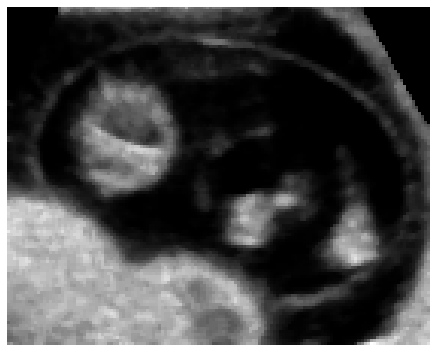

dataset6_median_2 90/180 (112, 140)


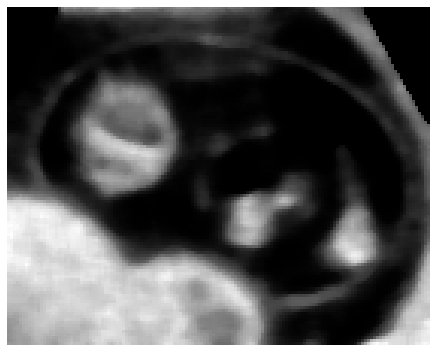

dataset6_median_3 90/180 (112, 140)


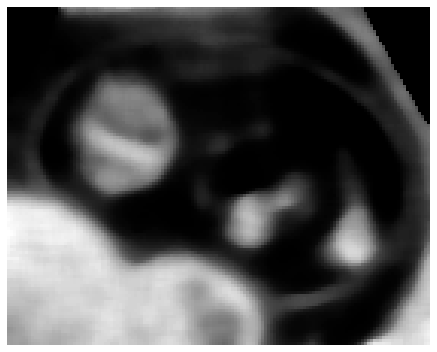

dataset6_original 90/180 (112, 140)


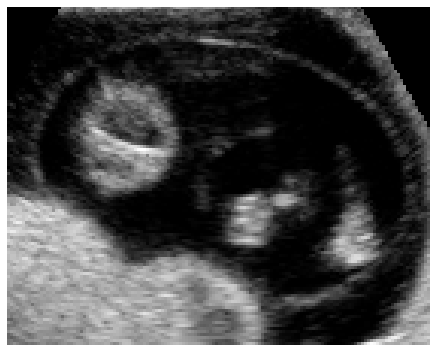

dataset6_speckle 90/180 (112, 140)


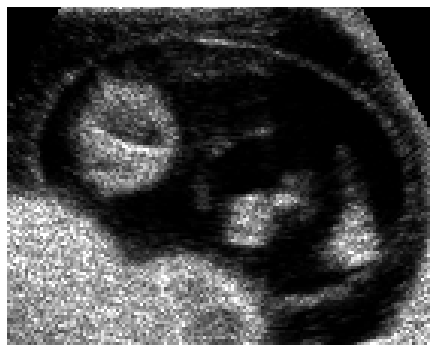

dataset7_anisodiff_4_10_0.04 92/184 (161, 181)


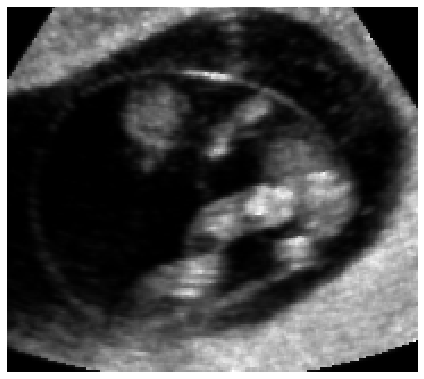

dataset7_anisodiff_4_10_0.06 92/184 (161, 181)


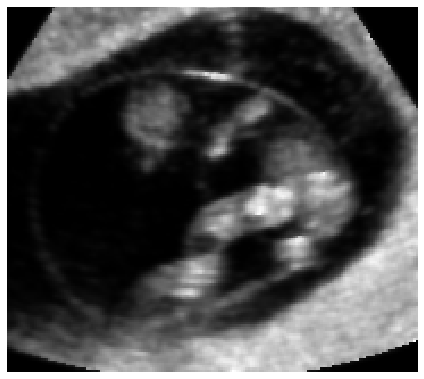

dataset7_anisodiff_4_15_0.04 92/184 (161, 181)


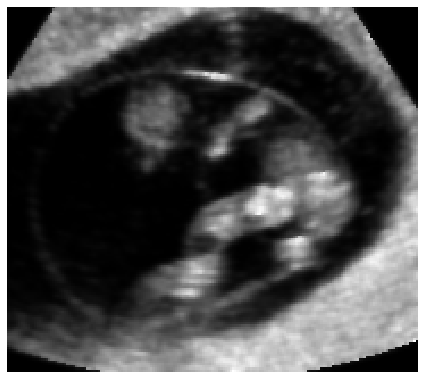

dataset7_anisodiff_4_15_0.06 92/184 (161, 181)


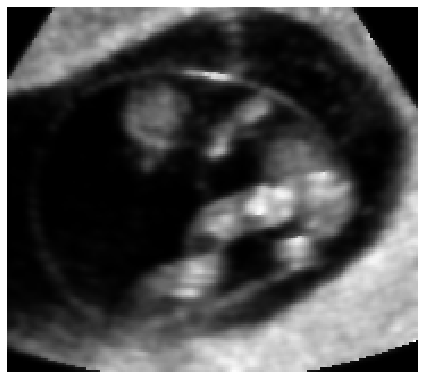

dataset7_curvatureflow_10_0.125 92/184 (161, 181)


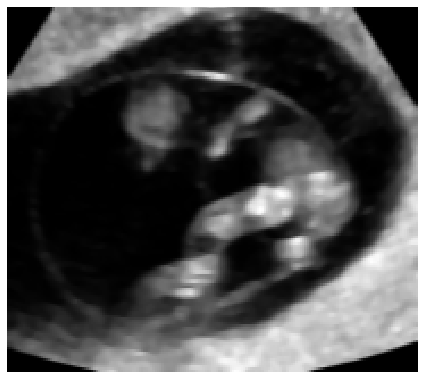

dataset7_curvatureflow_10_0.25 92/184 (161, 181)


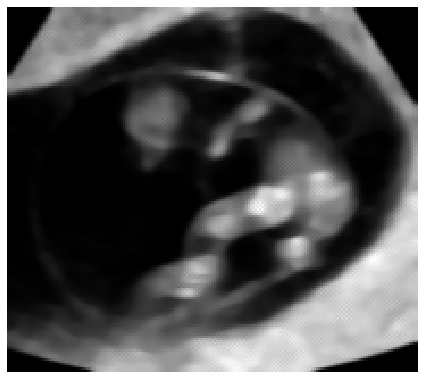

dataset7_curvatureflow_5_0.125 92/184 (161, 181)


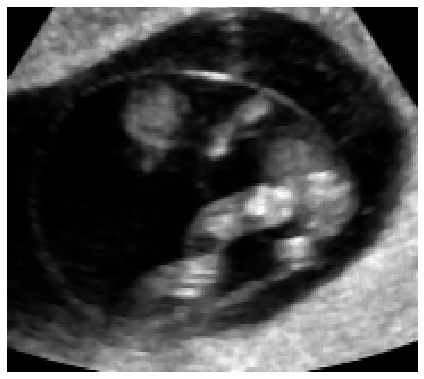

dataset7_curvatureflow_5_0.25 92/184 (161, 181)


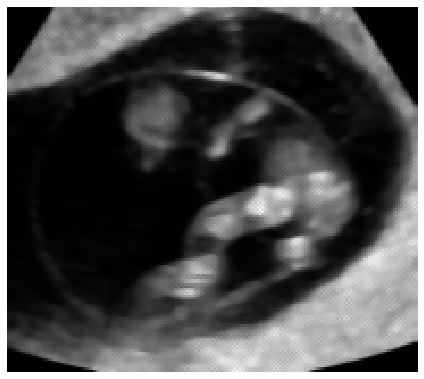

dataset7_gaussian_1 92/184 (161, 181)


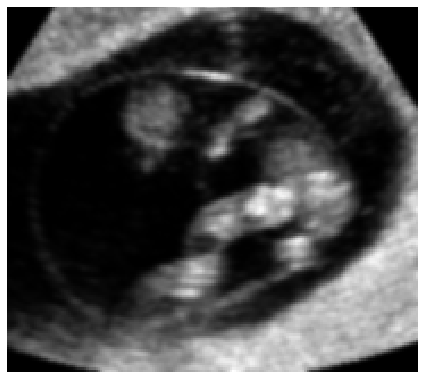

dataset7_gaussian_2 92/184 (161, 181)


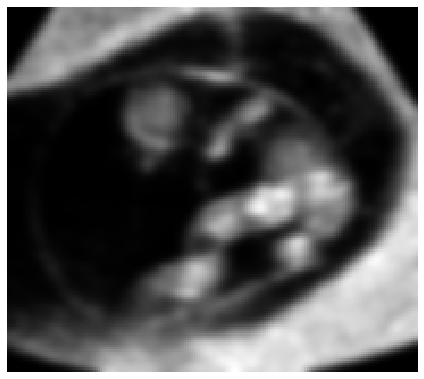

dataset7_gaussian_3 92/184 (161, 181)


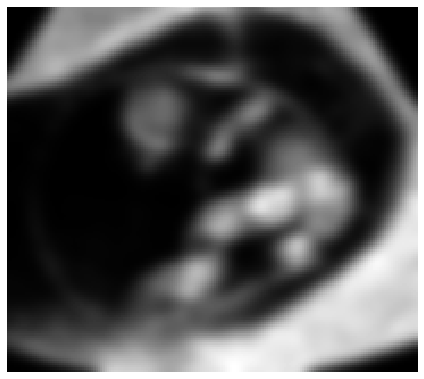

dataset7_median_1 92/184 (161, 181)


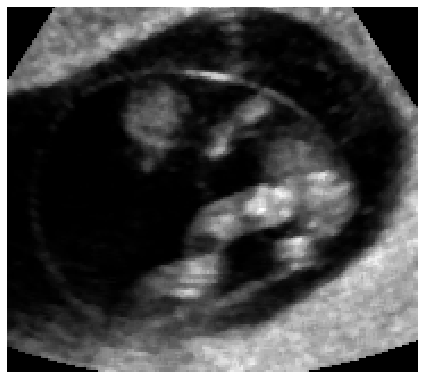

dataset7_median_2 92/184 (161, 181)


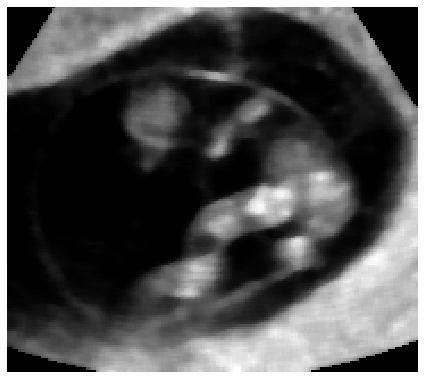

dataset7_median_3 92/184 (161, 181)


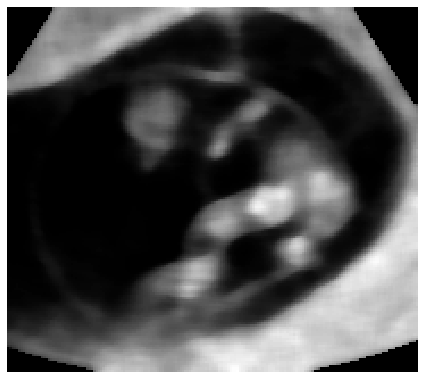

dataset7_original 92/184 (161, 181)


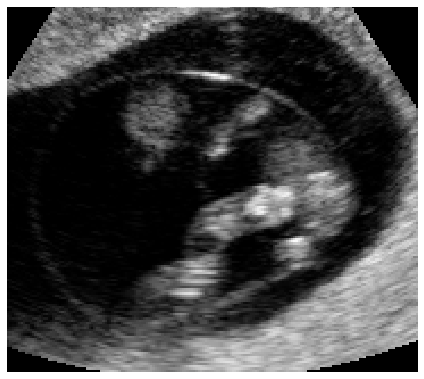

dataset7_speckle 92/184 (161, 181)


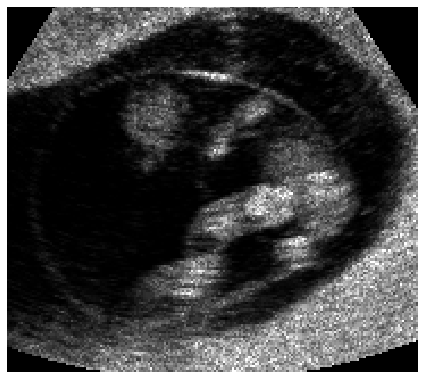

In [14]:
# save all the middle slices of the images
for key, image in dict_img.items():
    index = round(image.shape[0] /2.)
    titlename = key + ' ' + str(index) + '/' + str(image.shape[0]) + ' ' + str(image[index].shape)
    print(titlename)
    
    plt.imshow(image[index], cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plotname = str(key) + '_slice' + str(index) + '_'+ str(image.shape[0]) + '_size' + str(image[index].shape[1]) + '_' + str(image[index].shape[0])
    plt.savefig(RESULTS_PLOTS_PATH + '/' + plotname + '.png')
    plt.show()
    